# Supervised Learning Coursework 1 Coding Part

In [311]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from collections import defaultdict
from sklearn.model_selection import train_test_split

##### Initialise condition for question a

In [453]:
data_x = np.array([1, 2, 3, 4])
data_y = np.array([3, 2, 0, 5])

### Part 1

#### Question 1

In [454]:

def extract_features(x, degree):
    return np.array([x**i for i in range(degree + 1)]).T

def linear_regression(X, y):
    return np.linalg.solve(X.T @ X, X.T @ y)

##### Question 1a

In [ ]:
plt.figure(figsize=(10, 6))
x_plot = np.linspace(0, 5, 500)

for degree in range(0, 4):
    X = extract_features(data_x, degree)
    coeffs = linear_regression(X, data_y).round(2)
    X_plot = extract_features(x_plot, degree)
    y_plot = X_plot @ coeffs
    plt.plot(x_plot, y_plot, label=f'k={degree+1}')

plt.scatter(data_x, data_y, color='red', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-5, 10)
plt.title('Polynomial Fits for Different Degrees')
plt.legend()
plt.grid(True)
ax = plt.gca()
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

##### Question 1b

In [ ]:
for degree in range(0, 4):
    X = extract_features(data_x, degree)
    coeffs = linear_regression(X, data_y).round(2)
    print(f"Degree {degree+1} polynomial coefficients: {coeffs}")

##### Question 1c

In [ ]:
for degree in range(0, 4):
    X = extract_features(data_x, degree)
    coeffs = linear_regression(X, data_y)
    coeffs = coeffs.round(2)
    y_pred = X @ coeffs
    mse = np.mean((data_y - y_pred) ** 2)
    print(f"MSE for k={degree+1}: {mse}")

#### Question 2

##### Question 2a i

In [ ]:
def g_sigma(x, sigma):
    noise = np.random.normal(0, sigma, size=len(x))
    return np.sin(2 * np.pi * x)**2 + noise

# 生成数据并绘图
np.random.seed(66)
x_sample = np.random.uniform(0,1,30)
y_sample = g_sigma(x_sample, sigma=0.07)

x_plot = np.linspace(0, 1, 500)
y_plot = np.sin(2 * np.pi * x_plot)**2

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='sin^2(2πx)')
plt.scatter(x_sample, y_sample, color='red', label='Noisy Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function with Noise')
plt.legend()
plt.grid(True)
plt.savefig('2(a)i.png', bbox_inches = 'tight')
plt.show()

##### Question 2a ii

In [ ]:
degrees = [2, 5, 10, 14, 18]
plt.figure(figsize=(10, 6))
x_plot = np.linspace(0, 1, 500)
for degree in degrees:
    X = extract_features(x_sample, degree-1)
    coeffs = linear_regression(X, y_sample)
    X_plot = extract_features(x_plot, degree-1)
    y_plot = X_plot @ coeffs
    plt.plot(x_plot, y_plot, label=f'k={degree}')


plt.scatter(x_sample, y_sample, color='red', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fits for Different Degrees')
plt.legend()
plt.grid(True)
plt.ylim(-1.5, 1.5)
ax = plt.gca()
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('2(a)ii.png', bbox_inches = 'tight')
plt.show()


##### Question 2b

In [ ]:
training_errors = []
degrees = [i for i in range(1,19)]
for degree in range(0,18):
    X = extract_features(x_sample, degree)
    coeffs = linear_regression(X, y_sample)
    y_pred = X @ coeffs
    mse = np.mean((y_sample-y_pred)**2)
    training_errors.append(mse)
plt.figure(figsize=(10, 6))
plt.plot(degrees, np.log(training_errors), marker='o')
plt.xlabel('Polynomial Dimension (k)')
plt.ylabel('ln(MSE)')
plt.title('Log Training Error vs Polynomial Dimension')
plt.grid(True)
plt.savefig('2(b).png', bbox_inches = 'tight')
plt.show()

##### Question 2c

In [ ]:

x_test = np.random.uniform(0,1,1000)
y_test = g_sigma(x_test, sigma=0.07)

testing_errors = []
degrees = [i for i in range(1,19)]
for degree in range(0,18):
    X = extract_features(x_sample, degree)
    coeffs = linear_regression(X, y_sample)
    X_t = extract_features(x_test, degree)
    y_pred = X_t @ coeffs
    mse = np.mean((y_test-y_pred)**2)
    testing_errors.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(degrees, np.log(testing_errors), marker='o')
plt.xlabel('Polynomial Dimension (k)')
plt.ylabel('ln(MSE)')
plt.title('Log Testing Error vs Polynomial Dimension')
plt.grid(True)
plt.savefig('2(c).png', bbox_inches = 'tight')
plt.show()




##### Question 2d

In [ ]:
total_testing_errors = np.array([0.0 for i in range(18)])
total_train_errors = np.array([0.0 for i in range(18)])
for experiment in range(100):
    np.random.seed(experiment)
    sub_x_sample = np.random.uniform(0,1,30)
    sub_y_sample = g_sigma(sub_x_sample, sigma=0.07)
    testing_errors = np.array([0.0 for i in range(18)])
    training_errors = np.array([0.0 for i in range(18)])
    for degree in range(0,18):
        X = extract_features(sub_x_sample, degree)
        coeffs = linear_regression(X, sub_y_sample)
        X_t = extract_features(x_test, degree)
        y_train_pred = X @ coeffs
        y_test_pred = X_t @ coeffs
        mse_train = np.mean((sub_y_sample-y_train_pred)**2)
        mse_test = np.mean((y_test-y_test_pred)**2)
        training_errors[degree] = mse_train
        testing_errors[degree] = mse_test
    total_testing_errors = total_testing_errors + testing_errors
    total_train_errors = total_train_errors + training_errors
average_testing_errors = total_testing_errors / 100
average_train_errors = total_train_errors / 100
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(1,19)], np.log(average_testing_errors), marker='o',label='test_MSE')
plt.plot([i for i in range(1,19)], np.log(average_train_errors), marker='o',label='train_MSE')
plt.xlabel('Polynomial Dimension (k)')
plt.ylabel('ln(avg MSE)')
plt.title('Log Average Testing Error vs Polynomial Dimension')
plt.grid(True)
plt.legend()
plt.savefig('2(d).png', bbox_inches = 'tight')
plt.show()

#### Question 3


In [ ]:
def extract_features_trig(x, degree):
    return np.column_stack([np.sin((i + 1) * np.pi * x) for i in range(degree)])
np.random.seed(0)


x_test = np.random.uniform(0, 1, 1000)
y_test = g_sigma(x_test, sigma=0.07)


n_experiments = 100 
degrees = [i for i in range(1, 19)]  

x_sample = np.random.uniform(0, 1, 50)
y_sample = g_sigma(x_sample, sigma=0.07)

testing_errors = []

for degree in degrees:
    X_train = extract_features_trig(x_sample, degree)
    coeffs = linear_regression(X_train, y_sample)
    
    X_test = extract_features_trig(x_test, degree)
    y_pred = X_test @ coeffs
    mse = np.mean((y_test - y_pred) ** 2)
    testing_errors.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(degrees, np.log(testing_errors), marker='o')
plt.xlabel('Basis Dimension (k)')
plt.ylabel('ln(MSE)')
plt.title('Log Testing Error vs Basis Dimension (Trig Basis)')
plt.grid(True)
plt.show()


testing_errors_all = []

for experiment in range(n_experiments):
   
    x_sample = np.random.uniform(0, 1, 50)
    y_sample = g_sigma(x_sample, sigma=0.07)
  
    testing_errors = []
    
    for degree in degrees:
       
        X_train = extract_features_trig(x_sample, degree)
        coeffs = linear_regression(X_train, y_sample)
        
        # 提取测试特征并计算误差
        X_test = extract_features_trig(x_test, degree)
        y_pred = X_test @ coeffs
        mse = np.mean((y_test - y_pred) ** 2)
        testing_errors.append(mse)
    testing_errors_all.append(testing_errors)

average_testing_errors = np.mean(testing_errors_all, axis=0)


plt.figure(figsize=(10, 6))
plt.plot(degrees, np.log(average_testing_errors), marker='o')
plt.xlabel('Basis Dimension (k)')
plt.ylabel('ln(avg MSE)')
plt.title('Log Average Testing Error vs Basis Dimension (Trig Basis)')
plt.grid(True)
plt.show()

### Question 4

In [ ]:
csv_link = "http://www.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv"

data = pd.read_csv(csv_link)

display(data.head())

In [ ]:
X = data.iloc[:, :-1]  # All columns except the last
y = data.iloc[:, -1] 
results = {"method": [], "train_mse": [], "test_mse": []}
Naive_result = defaultdict(list)
Single_result = {f'Single Attribute{i+1}':defaultdict(list)for i in range(X.shape[1])}
All_result = defaultdict(list)
# Define number of runs
num_runs = 20

for _ in range(num_runs):
    # Split data into training and testing sets (2/3 for training, 1/3 for testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=None)

    # (a) Predicting with the mean y-value on the training set
    ones_train = np.ones_like(y_train).reshape(-1, 1)
    ones_test = np.ones_like(y_test).reshape(-1, 1)

    w_naive = linear_regression(ones_train, y_train)

    y_train_pred_naive = ones_train@w_naive
    y_test_pred_naive = ones_test@w_naive

    train_mse_naive = np.mean((y_train - y_train_pred_naive) ** 2)
    test_mse_naive = np.mean((y_test - y_test_pred_naive) ** 2)

    Naive_result["train_mse"].append(train_mse_naive)
    Naive_result["test_mse"].append(test_mse_naive)

    # (b) Predicting with a single attribute and a bias term
    for i in range(X.shape[1]):
        X_single_train = X_train.iloc[:, i].values.reshape(-1, 1)
        X_single_test = X_test.iloc[:, i].values.reshape(-1, 1)

        X_single_train = X_single_train.reshape(-1)
        X_single_train = extract_features(X_single_train, 1)
        w_single = linear_regression(X_single_train, y_train)

        X_single_test = X_single_test.reshape(-1)
        X_single_test = extract_features(X_single_test, 1)

        y_train_pred_singhe = X_single_train@w_single
        y_test_pred_single = X_single_test@w_single

        train_mse_single = np.mean((y_train-y_train_pred_singhe)**2)
        test_mse_single = np.mean((y_test-y_test_pred_single)**2)

        Single_result[f'Single Attribute{i+1}']["train_mse"].append(train_mse_single)
        Single_result[f'Single Attribute{i+1}']["test_mse"].append(test_mse_single)

    # (c) Predicting with all attributes
    w_all = linear_regression(X_train, y_train)

    y_train_pred_all = X_train@w_all
    y_test_pred_all = X_test@w_all

    train_mse_all = np.mean((y_train-y_train_pred_all)**2)
    test_mse_all = np.mean((y_test-y_test_pred_all)**2)

    All_result["train_mse"].append(train_mse_all)
    All_result["test_mse"].append(test_mse_all)

Naive_result["train_mse"] = np.mean(Naive_result["train_mse"])
Naive_result["test_mse"] = np.mean(Naive_result["test_mse"])

print('question a')
print("Naive method:")
print(f"Train MSE: {Naive_result['train_mse']}")
print(f"Test MSE: {Naive_result['test_mse']}")
print('')
print('question b')
print('The naive regression in problem a simply computes the mean of the training set and uses that as the prediction for all test data points.')
print('')
print('question c')
for i in range(X.shape[1]):
    Single_result[f'Single Attribute{i+1}']["train_mse"] = np.mean(Single_result[f'Single Attribute{i+1}']["train_mse"])
    Single_result[f'Single Attribute{i+1}']["test_mse"] = np.mean(Single_result[f'Single Attribute{i+1}']["test_mse"])
    print(f"Single Attribute {i+1}:")
    print(f"Train MSE: {Single_result[f'Single Attribute{i+1}']['train_mse']}")
    print(f"Test MSE: {Single_result[f'Single Attribute{i+1}']['test_mse']}")
    print('')
print('question d')
All_result["train_mse"] = np.mean(All_result["train_mse"])
All_result["test_mse"] = np.mean(All_result["test_mse"])
print("All Attributes:")
print(f"Train MSE: {All_result['train_mse']}")
print(f"Test MSE: {All_result['test_mse']}")

### Question 5

In [420]:
def gaussian_kernel(X1,X2,sigma):
    X1_sq = np.sum(X1**2, axis=1).reshape(-1, 1)
    X2_sq = np.sum(X2**2, axis=1).reshape(1, -1)
    dist_sq = X1_sq + X2_sq - 2 * X1@X2.T
    K = np.exp(-dist_sq / (2 * (sigma ** 2)))
    return K

def kernel_ridge_regression(X_train, y_train, gamma, sigma):
    K = gaussian_kernel(X_train, X_train, sigma)
    w =  np.linalg.solve(K + gamma * len(K) * np.eye(len(K)),y_train)
    return w

def kfold_cross_validation(X, y, k, gamma, sigma):
    n_samples = len(X)
    fold_size = n_samples // k
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    errors = []

    for i in range(k):
        valid_indices = indices[i * fold_size:(i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])

        X_train, X_valid = X[train_indices], X[valid_indices]
        y_train, y_valid = y[train_indices], y[valid_indices]

        w = kernel_ridge_regression(X_train, y_train, gamma, sigma)
        K_valid = gaussian_kernel(X_train, X_valid, sigma)
        y_val_pred = K_valid.T @ w
        errors.append(np.mean((y_valid - y_val_pred) ** 2))
    print(errors)

    return np.mean(errors)

In [428]:
data_url = "http://www0.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv"
data = pd.read_csv(data_url)

# 提取特征和目标
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


In [ ]:
gammas = []
sigmas = []
gamma_index = []
sigma_index = []

for i in range(-40, -25):
    gammas.append(2**i)
    gamma_index.append(i)

for i in np.arange(7, 13.5, 0.5):
    sigmas.append(2**i)
    sigma_index.append(i)

# 记录结果
results = []
various_results = []

best_gamma = None
best_sigma = None
best_cv_error = float('inf')
cv_errors = np.zeros((len(sigmas), len(gammas)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)


gamma_power = -40
sigma_power = 7
best_gamma_power = 0
best_sigma_power = 0
for gamma in gammas:
    for sigma in sigmas:
        print(gamma_power, sigma_power)
        cv_error = kfold_cross_validation(X_train, y_train, k=5, gamma=gamma, sigma=sigma)
        cv_errors[sigma_index.index(np.log2(sigma)), gamma_index.index(np.log2(gamma))] = cv_error
        results.append({'gamma': gamma, 'sigma': sigma, 'cv_error': cv_error})
        print(cv_error)

        if cv_error < best_cv_error:
            best_gamma = gamma
            best_sigma = sigma
            best_gamma_power = gamma_power
            best_sigma_power = sigma_power
            best_cv_error = cv_error
        sigma_power += 0.5
    sigma_power = 7
    gamma_power += 1

# 输出最佳参数
print(f"Best Gamma: 2^{best_gamma_power}, Best Sigma: 2^{best_sigma_power}, CV Error: {best_cv_error}")


In [ ]:
Z = cv_errors
Z = Z.reshape(15,13)
X, Y = np.meshgrid(sigma_index,gamma_index)
fig = plt.figure(figsize = (20,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Gamma power i', fontsize=17)
ax.set_ylabel('Sigma power j', fontsize=17)
ax.set_zlabel('Average MSE_validation', fontsize=17)
surface = ax.plot_surface(X, Y, Z, cmap='rainbow')
fig.colorbar(surface)
fig.savefig('5(b).png', bbox_inches = 'tight')

In [ ]:
w = kernel_ridge_regression(X_train, y_train, best_gamma, best_sigma)
K_test = gaussian_kernel(X_train, X_test, best_sigma)
K_train = gaussian_kernel(X_train, X_train, best_sigma)

y_test_pred = K_test.T @ w
y_train_pred = K_train.T @ w

train_mse = np.mean((y_train - y_train_pred) ** 2)
test_mse = np.mean((y_test - y_test_pred) ** 2)

print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")

In [ ]:
csv_link = "http://www.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv"
data = pd.read_csv(csv_link)
X = data.iloc[:, :-1]  # All columns except the last
y = data.iloc[:, -1]
results = {"method": [], "train_mse": [], "test_mse": []}
Naive_result = defaultdict(list)
Single_result = {f'Single Attribute{i+1}':defaultdict(list)for i in range(X.shape[1])}
All_result = defaultdict(list)
KRR_result = defaultdict(list)
# Define number of runs
num_runs = 20

for _ in range(num_runs):
    # Split data into training and testing sets (2/3 for training, 1/3 for testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=None)

    # (a) Predicting with the mean y-value on the training set
    ones_train = np.ones_like(y_train).reshape(-1, 1)
    ones_test = np.ones_like(y_test).reshape(-1, 1)

    w_naive = linear_regression(ones_train, y_train)

    y_train_pred_naive = ones_train@w_naive
    y_test_pred_naive = ones_test@w_naive

    train_mse_naive = np.mean((y_train - y_train_pred_naive) ** 2)
    test_mse_naive = np.mean((y_test - y_test_pred_naive) ** 2)

    Naive_result["train_mse"].append(train_mse_naive)
    Naive_result["test_mse"].append(test_mse_naive)

    # (b) Predicting with a single attribute and a bias term
    for i in range(X.shape[1]):
        X_single_train = X_train.iloc[:, i].values.reshape(-1, 1)
        X_single_test = X_test.iloc[:, i].values.reshape(-1, 1)

        X_single_train = X_single_train.reshape(-1)
        X_single_train = extract_features(X_single_train, 1)
        w_single = linear_regression(X_single_train, y_train)

        X_single_test = X_single_test.reshape(-1)
        X_single_test = extract_features(X_single_test, 1)

        y_train_pred_singhe = X_single_train@w_single
        y_test_pred_single = X_single_test@w_single

        train_mse_single = np.mean((y_train-y_train_pred_singhe)**2)
        test_mse_single = np.mean((y_test-y_test_pred_single)**2)

        Single_result[f'Single Attribute{i+1}']["train_mse"].append(train_mse_single)
        Single_result[f'Single Attribute{i+1}']["test_mse"].append(test_mse_single)

    # (c) Predicting with all attributes
    w_all = linear_regression(X_train, y_train)

    y_train_pred_all = X_train@w_all
    y_test_pred_all = X_test@w_all

    train_mse_all = np.mean((y_train-y_train_pred_all)**2)
    test_mse_all = np.mean((y_test-y_test_pred_all)**2)

    All_result["train_mse"].append(train_mse_all)
    All_result["test_mse"].append(test_mse_all)

    # (d) Predicting with KRR
    w = kernel_ridge_regression(X_train.values, y_train.values, best_gamma, best_sigma)
    K_test = gaussian_kernel(X_train.values, X_test.values, best_sigma)
    K_train = gaussian_kernel(X_train.values, X_train.values, best_sigma)

    y_test_pred = K_test.T @ w
    y_train_pred = K_train.T @ w

    train_mse = np.mean((y_train - y_train_pred) ** 2)
    test_mse = np.mean((y_test - y_test_pred) ** 2)

    KRR_result["train_mse"].append(train_mse)
    KRR_result["test_mse"].append(test_mse)

Naive_result["train_mse"] = np.mean(Naive_result["train_mse"])
Naive_result["test_mse"] = np.mean(Naive_result["test_mse"])

print('question a')
print("Naive method:")
print(f"Train MSE: {Naive_result['train_mse']}")
print(f"Test MSE: {Naive_result['test_mse']}")
print('')
print('question b')
print('The naive regression in problem a simply computes the mean of the training set and uses that as the prediction for all test data points.')
print('')
print('question c')
for i in range(X.shape[1]):
    Single_result[f'Single Attribute{i+1}']["train_mse"] = np.mean(Single_result[f'Single Attribute{i+1}']["train_mse"])
    Single_result[f'Single Attribute{i+1}']["test_mse"] = np.mean(Single_result[f'Single Attribute{i+1}']["test_mse"])
    print(f"Single Attribute {i+1}:")
    print(f"Train MSE: {Single_result[f'Single Attribute{i+1}']['train_mse']}")
    print(f"Test MSE: {Single_result[f'Single Attribute{i+1}']['test_mse']}")
    print('')
print('question d')
All_result["train_mse"] = np.mean(All_result["train_mse"])
All_result["test_mse"] = np.mean(All_result["test_mse"])
print("All Attributes:")
print(f"Train MSE: {All_result['train_mse']}")
print(f"Test MSE: {All_result['test_mse']}")
print('')
print('KRR')
KRR_result["train_mse"] = np.mean(KRR_result["train_mse"])
KRR_result["test_mse"] = np.mean(KRR_result["test_mse"])
print("Kernel Ridge Regression:")
print(f"Train MSE: {KRR_result['train_mse']}")
print(f"Test MSE: {KRR_result['test_mse']}")

# PART 2 

## 2.1 K-Nearest Neighbors

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### 2.1.1 Generating the Data

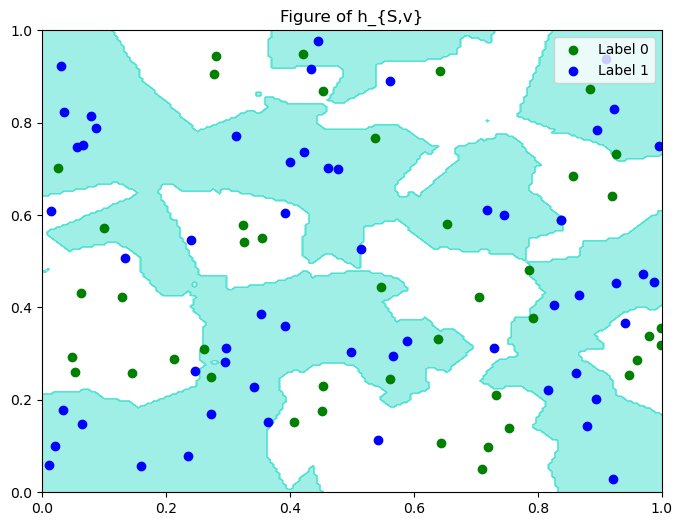

In [38]:
np.random.seed(77)
S = 100
X = np.random.rand(S, 2)
y = np.random.choice([0, 1], size = S)

def h_S_v(x_S, y_S, x, v):
    distances = np.linalg.norm(x_S - x, axis=1)
    nearest_indices = np.argsort(distances)[:v]
    nearest_labels = y_S[nearest_indices]

    return np.bincount(nearest_labels).argmax()

def plot_boundary(x_S, y_S, v, resolution=200):

    # Build Grid
    x_min, x_max = 0, 1
    y_min, y_max = 0, 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), np.linspace(y_min, y_max, resolution))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    predictions = np.array([h_S_v(x_S, y_S, point, v) for point in grid_points])
    Z = predictions.reshape(xx.shape)

    custom_cmap = ListedColormap(['white', 'turquoise'])
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha = 0.5, cmap = custom_cmap)
    plt.scatter(x_S[y_S == 0][:,0], x_S[y_S == 0][:,1], c = 'green', label = "Label 0")
    plt.scatter(x_S[y_S == 1][:,0], x_S[y_S == 1][:,1], c = 'blue', label = "Label 1")
    plt.title("Figure of h_{S,v}")
    plt.legend()
    plt.show()

plot_boundary(X, y , v = 3)


### 2.1.2 Estimated generalization error of k-NN as a function of k

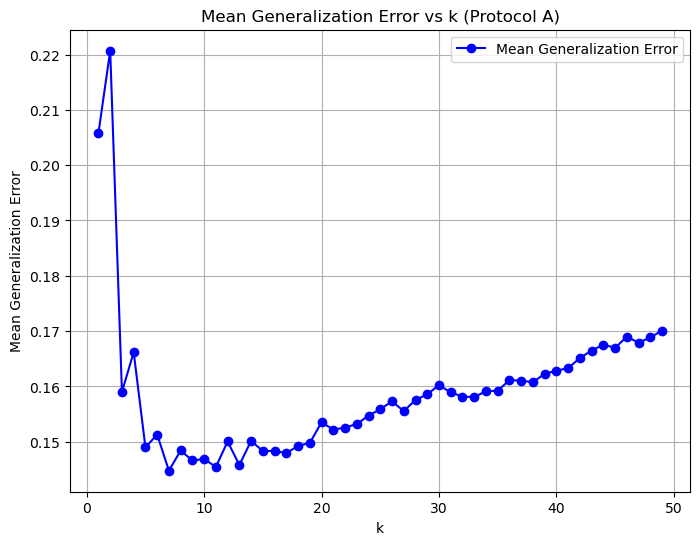

In [39]:
def generate_noise(S, v=3, size=1000, noise_prob=0.2):
    x_S, y_S = S
    X = np.random.rand(size, 2)
    y = []
    for x in X:
        if np.random.rand() > noise_prob:
            y.append(h_S_v(x_S, y_S, x, v))
        else:
            y.append(np.random.choice([0,1]))
    return X, np.array(y)

def calculate_error(X_train, y_train, X_test, y_test, k):
    errors = 0
    for i in range(len(X_test)):
        pred = h_S_v(X_train, y_train, X_test[i], k)
        if pred != y_test[i]:
            errors += 1
    return errors/len(X_test)

def generalize_err(S, ks, runs = 100, train_size = 1000, test_size = 1000):
    mean_errors = []
    for k in ks:
        errors = []
        for _ in range(runs):
            X_train, y_train = generate_noise(S, v=3, size=train_size, noise_prob=0.2)
            X_test, y_test = generate_noise(S, v=3, size=test_size, noise_prob=0.2)

            error = calculate_error(X_train, y_train, X_test, y_test, k)
            errors.append(error)
        mean_errors.append(np.mean(errors))
    return mean_errors

np.random.seed(77)
S_size = 100
x_S = np.random.rand(S_size, 2)
y_S = np.random.choice([0, 1], size=S_size)
S = (x_S, y_S)

ks = range(1, 50)

mean_errors = generalize_err(S, ks, runs=100, train_size=4000, test_size=1000)

plt.figure(figsize=(8, 6))
plt.plot(ks, mean_errors, marker='o', linestyle='-', color='b', label='Mean Generalization Error')
plt.title('Mean Generalization Error vs k (Protocol A)')
plt.xlabel('k')
plt.ylabel('Mean Generalization Error')
plt.grid()
plt.legend()
plt.show()

### 2.1.3 Determine the optimal k as a function of the number of training points (m)

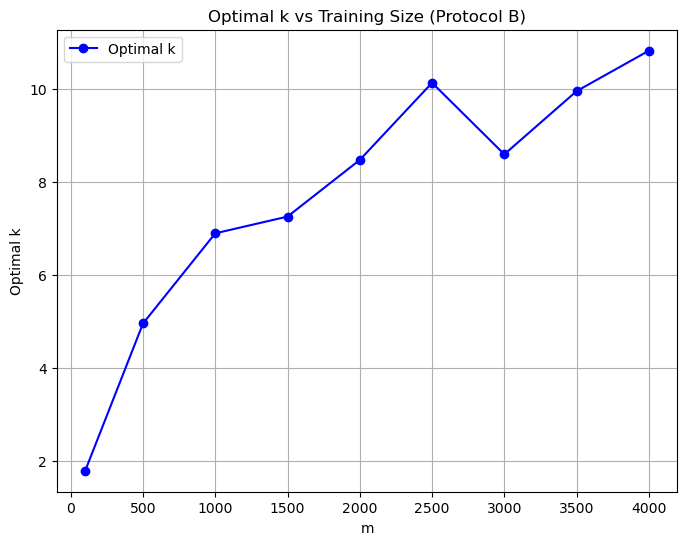

In [40]:
def optimal_k(S, ms, ks, runs=100, test_size=1000):
    mean_optimal_ks = []

    for m in ms:
        optimal_ks = []
        for _ in range(runs):
            X_train, y_train = generate_noise(S, v=3, size=m, noise_prob=0.2)
            X_test, y_test = generate_noise(S, v=3, size=test_size, noise_prob=0.2)
            errors = [calculate_error(X_train, y_train, X_test, y_test, k) for k in ks]
            optimal_k = ks[np.argmin(errors)]
            optimal_ks.append(optimal_k)
        mean_optimal_ks.append(np.mean(optimal_ks))
    return mean_optimal_ks

ms = [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
ks = range(1, 50)

np.random.seed(77)
S_size = 100
x_S = np.random.rand(S_size, 2)
y_S = np.random.choice([0, 1], size=S_size)
S = (x_S, y_S)

mean_optimal_ks = optimal_k(S, ms, ks, runs=100, test_size=1000)

plt.figure(figsize=(8, 6))
plt.plot(ms, mean_optimal_ks, marker='o', linestyle='-', color='b', label='Optimal k')
plt.title('Optimal k vs Training Size (Protocol B)')
plt.xlabel('m')
plt.ylabel('Optimal k')
plt.grid()
plt.legend()
plt.show()